In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")
from sklearn import tree

Target Class: 'Survived'
Features to be investigated: 
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Clustering for n= 2
inertia= 1000097.4358759543
silhouette= 0.7912263220913549
Clustering for n= 3
inertia= 548397.5625089258
silhouette= 0.6616827392994199
Clustering for n= 4
inertia= 344773.09035999654
silhouette= 0.647606792971137
Clustering for n= 5
inertia= 254076.55268842925
silhouette= 0.6144227496532667
Clustering for n= 6
inertia= 189578.68585274124
silhouette= 0.4431925603152415
Clustering for n= 7
inertia= 144362.25092813163
silhouette= 0.4733836707665814
Clustering for n= 8
inertia= 121227.7498696
silhouette= 0.4903192414414953
Clustering for n= 9
inertia= 105328.65367091258
silhouette= 0.4807200813695872
Clustering for n= 10
inertia= 93519.90103060158
silhouette= 0.4224360969569126
Clustering for n= 11
inertia= 83698.51082439594
silhouette= 0.42914900654205995
Optimal number of clusters according to Silhouette 

Features names  Index(['Pclass', 'Age', 'Sib

{'whiskers': [<matplotlib.lines.Line2D at 0x162f95430>,
 'caps': [<matplotlib.lines.Line2D at 0x162f95970>,
 'boxes': [<matplotlib.lines.Line2D at 0x162f95190>,
 'medians': [<matplotlib.lines.Line2D at 0x162f95eb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x162fa2190>,
 'means': []}

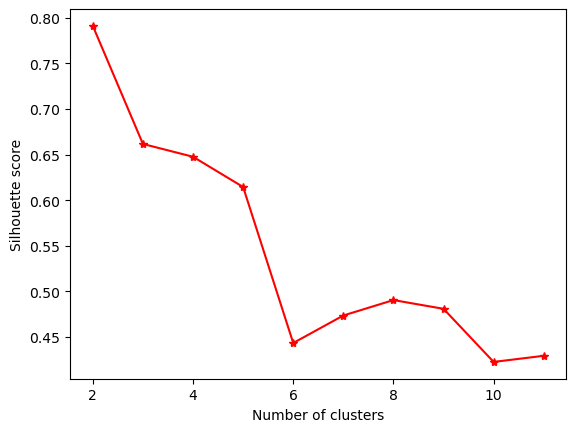

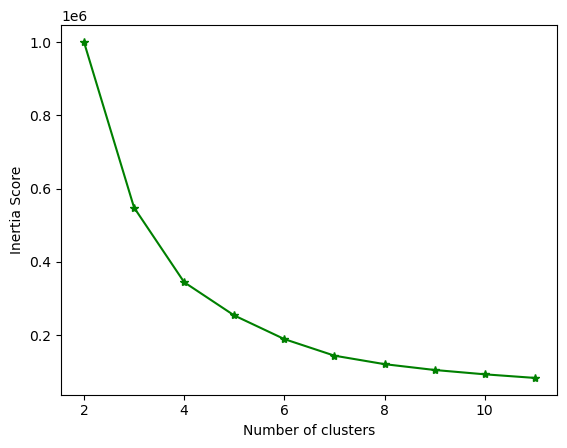

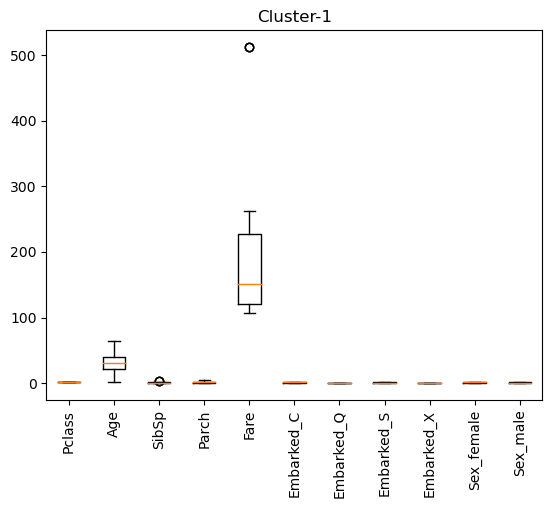

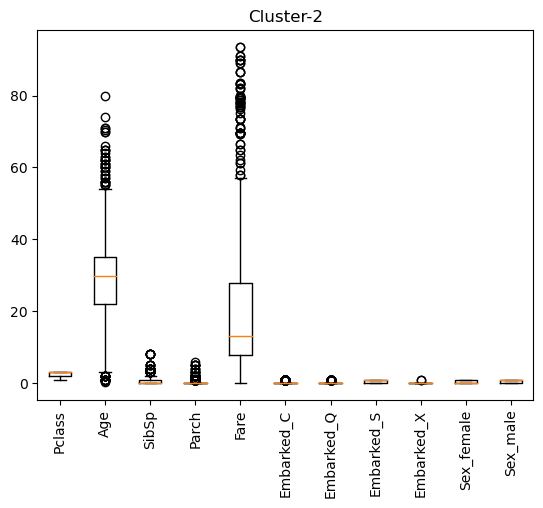

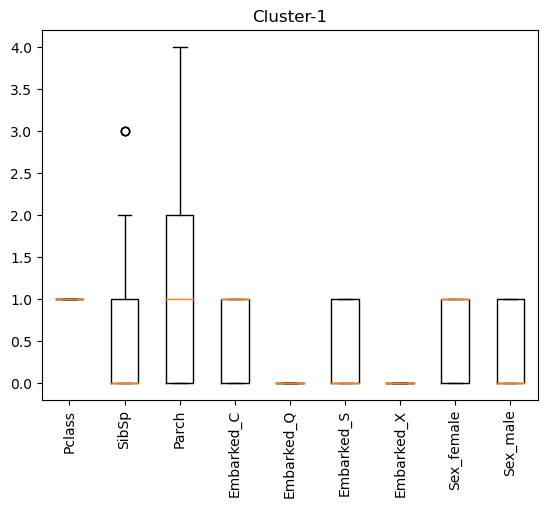

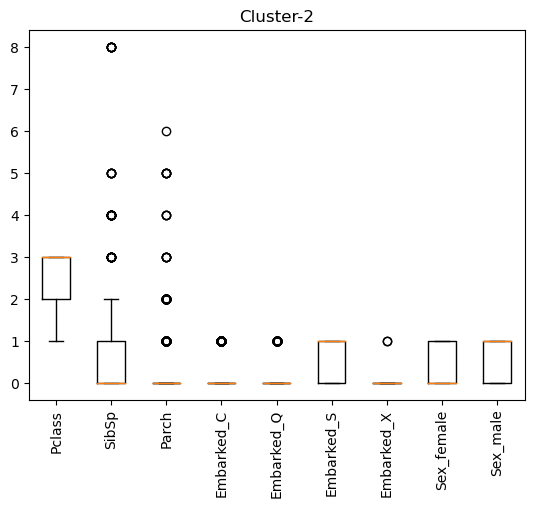

In [2]:
def handle_categorical_na(df):
    ## replacing the null/na/nan values in 'Cabin' attribute with 'X'
#     df.Cabin = df.Cabin.fillna(value='X')
#     ## Stripping the string data in 'Cabin' and 'Ticket' features of numeric values and duplicated characters
#     df.Cabin = [''.join(set(filter(str.isalpha, s))) for s in df.Cabin]
#     df.Ticket = [''.join(set(filter(str.isalpha, s))) for s in df.Ticket]
#     ## replacing the '' values in 'Ticket' attribute with 'X'
#     df.Ticket.replace(to_replace='',value='X',inplace=True)
    ## Imputing the null/na/nan values in 'Age' attribute with its mean value 
    df.Age.fillna(value=df.Age.mean(),inplace=True)
    ## replacing the null/na/nan values in 'Embarked' attribute with 'X'
    df.Embarked.fillna(value='X',inplace=True)
    return df



data = pd.read_csv('train.csv')
data.head()
data.describe()

pd.DataFrame({'percent_missing': data.isnull().sum() * 100 / len(data)})


# Names of the features extacted from the data
selFeatures = list(data.columns.values)

# Removing the target variable from the column values
# we are doing clustering, so we do not need it
targetCol = 'Survived'
selFeatures.remove(targetCol)

# Removing features with unique values
for i in selFeatures:
    if data.shape[0] == len(pd.Series(data[i]).unique()) :
        selFeatures.remove(i)
        
# Removing features with high percentage of missing values
selFeatures.remove('Cabin')
        
# Also removing cabin and ticket features for the initial run.
selFeatures.remove('Ticket')
        

print("Target Class: '"+ targetCol + "'")
print('Features to be investigated: ')
print(selFeatures)


data=data[selFeatures]

data = handle_categorical_na(data)

## using One Hot Encoding for handling categorical data
data = pd.get_dummies(data,columns=['Embarked','Sex'],prefix=['Embarked','Sex'])

# Covert data to numpy arrays
X=np.array(data)


## Clustering
#run clusterings for differen values of k
inertiasAll=[]
silhouettesAll=[]
for n in range(2,12):
    print ('Clustering for n=',n)
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)

#get cluster centers
    kmeans.cluster_centers_

#evalute
    print ('inertia=',kmeans.inertia_)
    silhouette_values = silhouette_samples(X, y_kmeans)
    print ('silhouette=', np.mean(silhouette_values))
    
    inertiasAll.append(kmeans.inertia_)
    silhouettesAll.append(np.mean(silhouette_values))    



#Print some statistical data: intertia and silhouetter
plt.figure(1)
plt.plot(range(2,12),silhouettesAll,'r*-')
plt.ylabel('Silhouette score')
plt.xlabel('Number of clusters')
plt.figure(2)
plt.plot(range(2,12),inertiasAll,'g*-')
plt.ylabel('Inertia Score')
plt.xlabel('Number of clusters')


print ("Optimal number of clusters according to Silhouette ")

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
kmeans.cluster_centers_



# Next, print some information on cluster centres
#    class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#    name - Name
#    sex - Sex
#    age - Age
#    sibsp - Number of Siblings/Spouses Aboard
#    parch - Number of Parents/Children Aboard
#    ticket - Ticket Number
#    fare - Passenger Fare
#    cabin - Cabin
#    embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
#    boat - Lifeboat (if survived)
#    body - Body number (if did not survive and body was recovered)
print('\nFeatures names ',data.columns)
print('\nCluster Centre 1',kmeans.cluster_centers_[0])
print('\nCluster Centre 2',kmeans.cluster_centers_[1])


print('\nSize of Cluster-1=', len(kmeans.labels_[kmeans.labels_==0]))
print('Size of Cluster-2=', len(kmeans.labels_[kmeans.labels_==1]))






# Plot a box-plot for the data distribution of each feature
# Get the indexes of points that belong to cluster 1 (and to cluster 2)
idxCluster1=np.where(kmeans.labels_==0)
idxCluster2=np.where(kmeans.labels_==1)

plt.figure(3)
plt.title('Cluster-1')
# x-labels are turned 90 degrees
plt.xticks(rotation=90)
plt.boxplot(X[idxCluster1],labels=list(data.columns))

plt.figure(4)
plt.title('Cluster-2')
# x-labels are turned 90 degrees
plt.xticks(rotation=90)
plt.boxplot(X[idxCluster2],labels=list(data.columns))






#a better plot
# Plot a box-plot for the data distribution of each feature
# Get the indexes of points that belong to cluster 1 (and to cluster 2)
idxCluster1=np.where(kmeans.labels_==0)
idxCluster2=np.where(kmeans.labels_==1)

plt.figure(5)
plt.title('Cluster-1')
# x-labels are turned 90 degrees
plt.xticks(rotation=90)
rows1=idxCluster1[0].tolist()

# skip name: that is why 1 is mising
plt.boxplot(X[np.ix_(rows1,[0,2,3,5,6,7,8,9,10])],
        labels=['Pclass', 'SibSp', 'Parch',  'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Embarked_X', 'Sex_female', 'Sex_male'])


plt.figure(6)
plt.title('Cluster-2')
rows2=idxCluster2[0].tolist()
# x-labels are turned 90 degrees
plt.xticks(rotation=90)

# skip name: that is why 1 is mising
plt.boxplot(X[np.ix_(rows2,[0,2,3,5,6,7,8,9,10])] ,
            labels=['Pclass', 'SibSp', 'Parch',  'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Embarked_X', 'Sex_female', 'Sex_male'])



